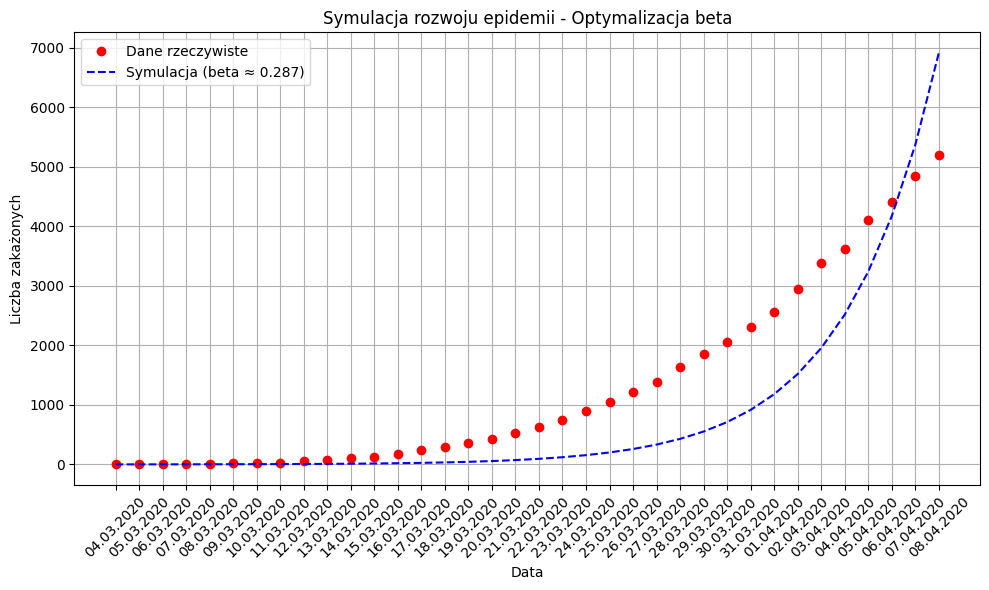

Najlepsza beta: 0.287


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych

# Funkcja do aktualizacji modelu
def update(beta):
    t_max = len(dates)  # Ilość dni
    I = np.zeros(t_max)
    S = np.zeros(t_max)
    I[0] = I0
    S[0] = S0
    dt = 1  # Krok czasowy

    # Rozwiązanie równania metodą Eulera
    for t in range(1, t_max):
        dI = beta * I[t-1] * S[t-1] * dt / n
        I[t] = I[t-1] + dI
        S[t] = S[t-1] - dI

    return I

# Funkcja do obliczania MSE (średni błąd kwadratowy)
def mse(beta):
    I_simulated = update(beta)  # Symulacja dla danego beta
    return np.mean((I_simulated - infected_data)**2)  # Obliczenie MSE

# Optymalizacja: Przeszukiwanie w przedziale beta
beta_values = np.linspace(0.2, 0.4, 500)  # Siatka wartości beta od 0 do 1 (100 punktów)
mse_values = [mse(beta) for beta in beta_values]  # Obliczenie MSE dla każdej wartości beta

# Znalezienie najlepszego beta (najmniejszy MSE)
best_beta = beta_values[np.argmin(mse_values)]

# Symulacja z najlepszym beta
Iesi = update(best_beta)  # Zapisanie wyników do Iesi

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(range(len(dates)), infected_data, 'o', label='Dane rzeczywiste', color='red')
plt.plot(range(len(dates)), Iesi, label=f'Symulacja (beta ≈ {best_beta:.3f})', linestyle='--', color='blue')
plt.xticks(range(len(dates)), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii - Optymalizacja beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wyświetlenie najlepszego beta
print(f"Najlepsza beta: {best_beta:.3f}")

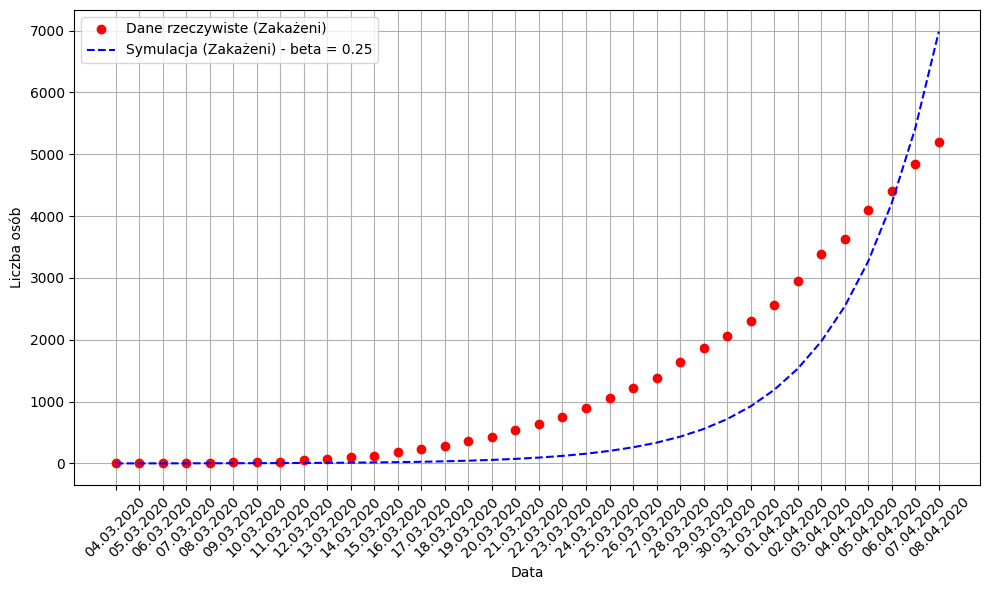

Najlepsza beta: 0.2529058116232465


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja wartości
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Funkcja do obliczania MSE (średni błąd kwadratowy)
def mse(beta):
    S, I = n - infected_data[0], infected_data[0]
    h = 1  # Krok czasowy (1 dzień)
    I_vals = [I]
    
    # Symulacja RK4
    for t in range(1, len(dates)):
        S, I = rk4_step(S, I, beta, n, h)
        I_vals.append(I)
    
    # Obliczenie MSE
    return np.mean((np.array(I_vals) - np.array(infected_data))**2)

# Poszukiwanie najlepszego beta
beta_values = np.linspace(0.2, 0.5, 500)  # Siatka wartości beta od 0 do 2
mse_values = [mse(beta) for beta in beta_values]  # Obliczenie MSE dla każdej wartości beta

# Znalezienie najlepszego beta (najmniejszy MSE)
best_beta = beta_values[np.argmin(mse_values)]

# Symulacja z najlepszym beta
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzień)
Irksi = [I]  # Zmienna, do której zapisujemy wartości zakażonych

# Symulacja RK4 dla najlepszego beta
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, best_beta, n, h)
    Irksi.append(I)  # Zapisanie wartości zakażonych do Irksi

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, Irksi, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Wyświetlenie najlepszego beta
print(f"Najlepsza beta: {best_beta}")

In [17]:
import numpy as np

# Parametry
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020',
         '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', '27.03.2020',
         '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020',
         '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
N = 37_900_000  # populacja
I0 = 1  # początkowa liczba infekcji
t = np.linspace(0, 50, len(dates))  # czas w dniach
best_beta1 = 0.305  # najlepsza beta dla eulera
best_beta2 = 0.2529058116232465  # najlepsza beta dla rk4
beta = (best_beta1 + best_beta2) / 2  # średnia beta


# Funkcja obliczająca wynik z obsługą wyjątków i stabilizacją numeryczną
def analitycal(N, I0, t, beta):
    try:
        # Obliczenie dużych wartości
        x = N * beta * t
        
        # Unikanie log(x) dla x = 0, używając małego epsilon
        epsilon = 1e-10  # Próg, aby uniknąć log(0)
        log_x = np.log(np.where(x > epsilon, x, epsilon))  # Zastosowanie log(x) tylko wtedy, gdy x > 0
        
        # Logarytmiczne podejście (redukcja ryzyka przepełnienia)
        numerator_log = np.log(I0) + log_x
        denominator_log = np.log(1 + (I0 / N) * (np.exp(log_x) - 1))
        
        # Wynik w przestrzeni logarytmicznej
        result_log = numerator_log - denominator_log
        
        # Ostateczny wynik po przekształceniu z logarytmu do normalnej skali
        result = np.exp(result_log)
        
        return result
    
    except OverflowError:
        print("Błąd: Przepełnienie liczbowe w obliczeniach. Sprawdź parametry.")
        return None
    except Exception as e:
        print(f"Błąd: Wystąpił nieoczekiwany błąd: {e}")
        return None


# Wywołanie funkcji i drukowanie wyników
IsiAN = analitycal(N, I0, t, beta)
if IsiAN is not None:
    print("Wyniki:", IsiAN)
else:
    print("Obliczenia zakończone niepowodzeniem.")


Wyniki: [1.00000003e-10 1.07996159e+07 1.68093910e+07 2.06375156e+07
 2.32894538e+07 2.52350922e+07 2.67234382e+07 2.78987574e+07
 2.88504062e+07 2.96366858e+07 3.02972550e+07 3.08600301e+07
 3.13452313e+07 3.17678637e+07 3.21392971e+07 3.24683037e+07
 3.27617601e+07 3.30251328e+07 3.32628224e+07 3.34784110e+07
 3.36748441e+07 3.38545662e+07 3.40196227e+07 3.41717384e+07
 3.43123777e+07 3.44427922e+07 3.45640578e+07 3.46771047e+07
 3.47827408e+07 3.48816720e+07 3.49745168e+07 3.50618202e+07
 3.51440639e+07 3.52216754e+07 3.52950353e+07 3.53644836e+07]


NameError: name 'Irksi' is not defined

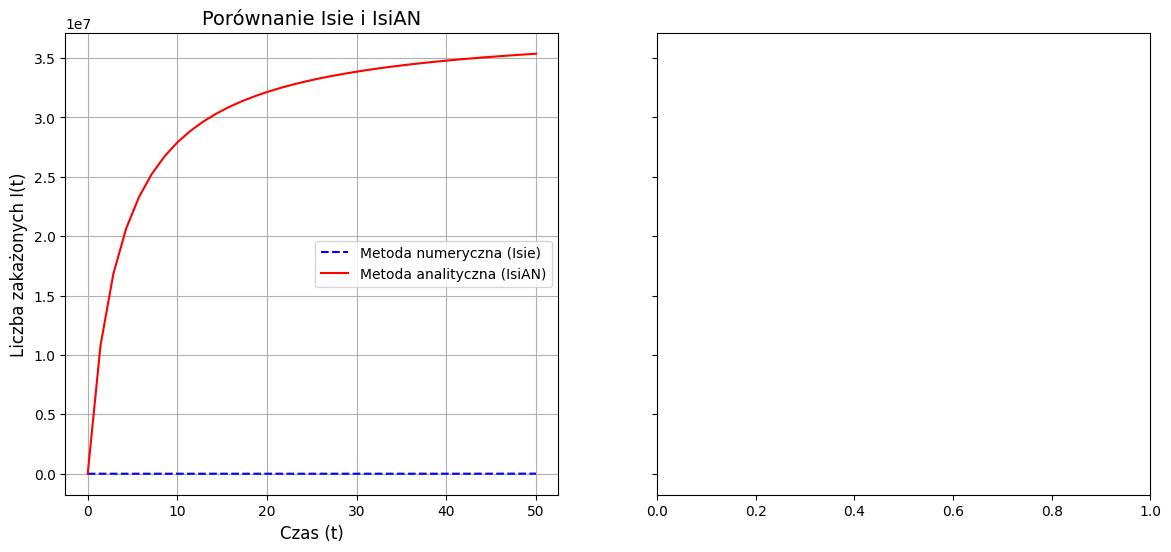

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Przykładowy wektor czasu (dopasowany do długości danych)
t = np.linspace(0, 50, len(Iesi))  # Zakładamy równomierny czas próbkowania

# Tworzenie wykresu
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Wykres 1: Porównanie Isie i IsiAN
axs[0].plot(t, Iesi, label='Metoda numeryczna (Isie)', linestyle='--', color='blue')
axs[0].plot(t, IsiAN, label='Metoda analityczna (IsiAN)', linestyle='-', color='red')
axs[0].set_title('Porównanie Isie i IsiAN', fontsize=14)
axs[0].set_xlabel('Czas (t)', fontsize=12)
axs[0].set_ylabel('Liczba zakażonych I(t)', fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True)

# Wykres 2: Porównanie Irksi i IsiAN
axs[1].plot(t, Irksi, label='Metoda alternatywna (Irksi)', linestyle='--', color='green')
axs[1].plot(t, IsiAN, label='Metoda analityczna (IsiAN)', linestyle='-', color='red')
axs[1].set_title('Porównanie Irksi i IsiAN', fontsize=14)
axs[1].set_xlabel('Czas (t)', fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True)

# Dostosowanie układu
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()